<a href="https://colab.research.google.com/github/jekrami/Astro/blob/main/Copy_of_amazon_chronos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-g_1g8a6_
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-g_1g8a6_
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install torch
!pip install chronos


In [3]:
!pip install Chronos

In [4]:
from chronos import ChronosPipeline

tensor([53935.4297, 53952.4805, 53989.8945,  ..., 54317.8047, 54314.7656,
        54309.1484])


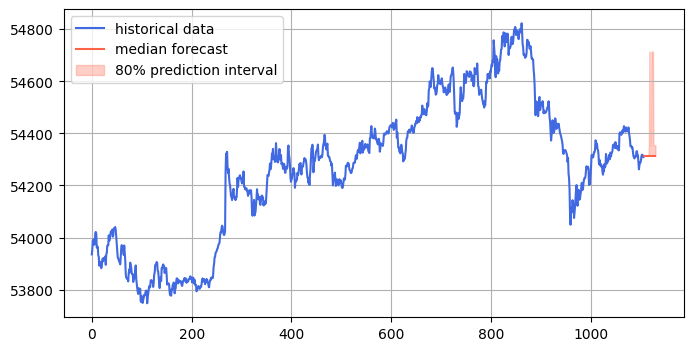

In [8]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(

  "amazon/chronos-t5-tiny",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)


def get_bitcoin_closing_price_tensor(interval='1m', period='1d'):
    try:
        ticker = "BTC-USD"
        btc_data = yf.Ticker(ticker)
        df = btc_data.history(interval=interval, period=period)

        if df.empty:
            return None

        closing_prices = df['Close'].values
        return torch.tensor(closing_prices, dtype=torch.float32)

    except Exception:
        return None

# Usage
bitcoin_tensor = get_bitcoin_closing_price_tensor()

# The tensor is now in the bitcoin_tensor variable
# You can use it directly in your trading model or further processing




#df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension

#context = torch.tensor(df["#Passengers"])

context = bitcoin_tensor
print(context)

prediction_length = 24
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(context), len(context) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(bitcoin_tensor, color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()
